
# Exploratory Data Analysis on Bus Stations in Riyadh



The dataset includes latitude and longitude for each bus station. Let's explore the data creatively with insights and visuals!


In [1]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

file_path = 'Finall_bus.csv'
data = pd.read_csv(file_path)

print(data.head())


                   attraction_by_bus   latitude  longitude  \
0       Noor Islaic Bank Bus Station  25.155520  55.228526   
1          Equity Metro Stop South 1  25.125880  55.206978   
2    Sharaf DG Metro Bus Station 2-1  25.257540  55.296564   
3  Dubai Internet City Metro Station  25.102007  55.173651   
4                Dubai Internet City  25.092487  55.160545   

                         StationName  Station_Latitude  Station_Longitude  \
0            Noor Bank Metro Station         25.155520          55.228526   
1                  FGB Metro Station         25.126626          55.207849   
2            Sharaf DG Metro Station         25.258248          55.297215   
3  Dubai Internet City Metro Station         25.102007          55.173651   
4              Nakheel Metro Station         25.088779          55.157992   

   Distance_to_Attraction  
0                0.000000  
1              120.619925  
2              102.280863  
3                0.000000  
4              484.81045

In [3]:
missing = data.isnull().sum()*100 / len(data)
print(missing)

StationName          0.0
latitude             0.0
longitude            0.0
StationName.1        0.0
Station_Latitude     0.0
Station_Longitude    0.0
dtype: float64


/var/folders/sg/rzxhx2m502xfxs_71hzjkggm0000gn/T/ipykernel_1121/1107736341.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_summary.index, y=missing_data_summary.values, palette="viridis")


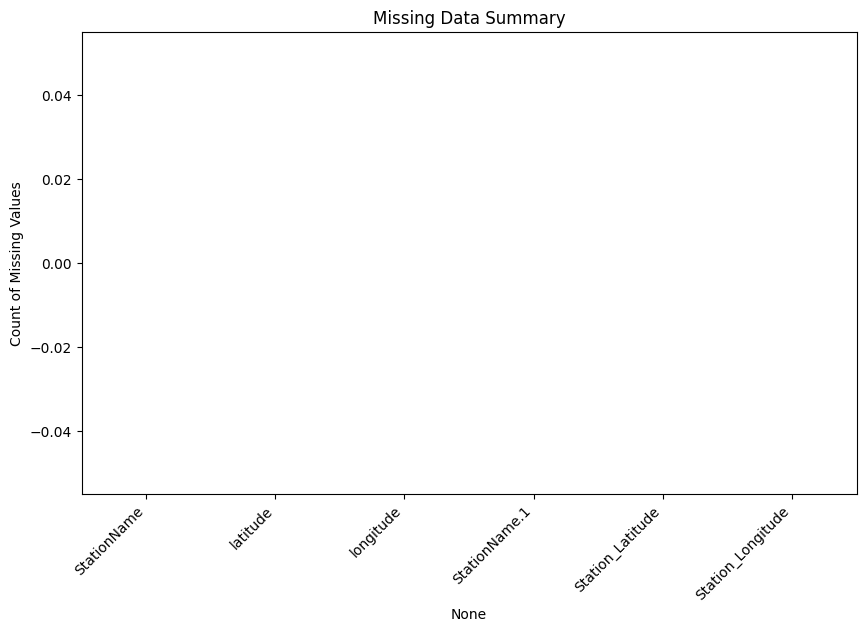

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_data_summary = data.isnull().sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_summary.index, y=missing_data_summary.values, palette="viridis")
plt.title("Missing Data Summary")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
import matplotlib.pyplot as plt

# Calculate the IQR for the Distance_to_Attraction column
Q1 = data['Distance_to_Attraction'].quantile(0.25)
Q3 = data['Distance_to_Attraction'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (data['Distance_to_Attraction'] < lower_bound) | (data['Distance_to_Attraction'] > upper_bound)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot non-outliers (in blue)
plt.scatter(data.loc[~outliers, 'Station_Longitude'], data.loc[~outliers, 'Station_Latitude'], c='blue', label='Non-Outliers', alpha=0.6)

# Plot outliers (in red)
plt.scatter(data.loc[outliers, 'Station_Longitude'], data.loc[outliers, 'Station_Latitude'], c='red', label='Outliers', alpha=1.0)

# Annotate outlier stations with their names
for i, row in data.loc[outliers].iterrows():
    plt.text(row['Station_Longitude'], row['Station_Latitude'], row['StationName'], fontsize=8, ha='right', color='red', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot with Outliers Colored Differently (Distance_to_Attraction) and Station Names', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


KeyError: 'Distance_to_Attraction'

### Insights on Missing Data and Bus Station Distribution

-**No Missing Data Exists**: The dataset **not** contain any null values in the fields analyzed, resulting in bars with zero height.

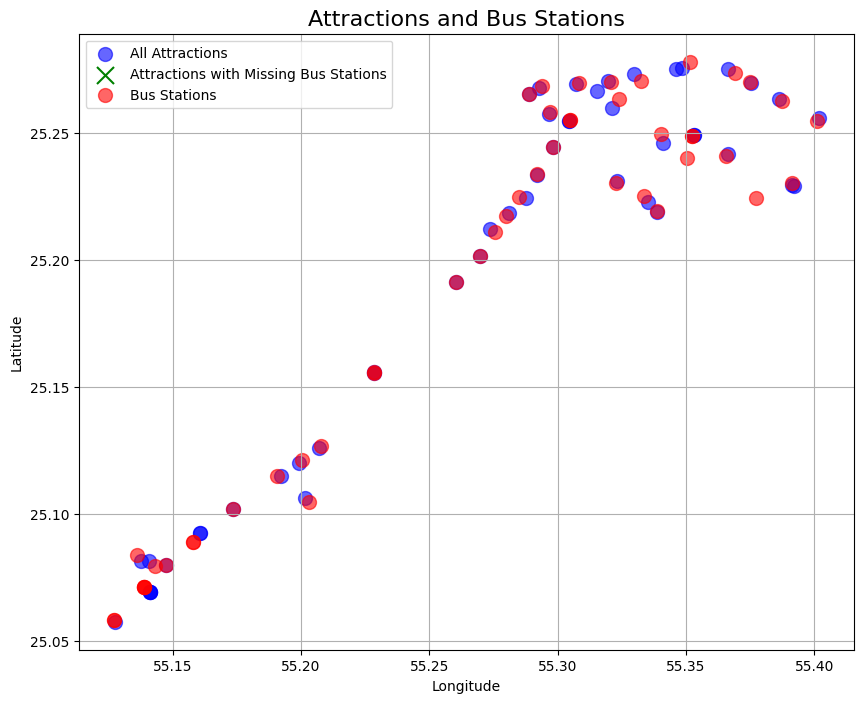

In [25]:
import matplotlib.pyplot as plt

attractions_with_null_bus = data[data['Station_Latitude'].isnull() | data['Station_Longitude'].isnull()]

# Plotting all attractions, attractions with missing bus stations, and valid bus stations
plt.figure(figsize=(10, 8))

plt.scatter(data['longitude'], data['latitude'], c='blue', label='All Attractions', alpha=0.6, marker='o', s=100)

plt.scatter(attractions_with_null_bus['longitude'], attractions_with_null_bus['latitude'], c='green', label='Attractions with Missing Bus Stations', alpha=1.0, marker='x', s=150)

plt.scatter(data['Station_Longitude'], data['Station_Latitude'], c='red', label='Bus Stations', alpha=0.6, marker='o', s=100)

plt.title('Attractions and Bus Stations', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.grid(True)
plt.show()

### Insights on Bus Station Distribution

- **Good Coverage in Urban Areas**:Bus stations are densely clustered near many attractions, ensuring accessibility in urban centers.


In [11]:
import folium

map_center = [data['latitude'].mean(), data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add attractions to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['attraction_by_bus'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add stations to the map
for _, row in data.iterrows():
    if not pd.isna(row['Station_Latitude']) and not pd.isna(row['Station_Longitude']):
        folium.Marker(
            location=[row['Station_Latitude'], row['Station_Longitude']],
            popup=row['StationName'],
            icon=folium.Icon(color='red', icon='bus')
        ).add_to(m)

m.save('attractions_stations_map7.html')
print("Map saved as 'attractions_stations_map6.html'")


Map saved as 'attractions_stations_map6.html'
